In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.optim as optim
from torch.nn import CrossEntropyLoss
from torch.utils.data import DataLoader

import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms

from torchinfo import summary

from ActiveShiftLayer import ASL
from util import test_loss, train_NN

In [2]:
print(torch.version.cuda)
#print(torch.zeros(1).cuda())
torch.cuda.device_count()

11.6


1

In [3]:
if torch.cuda.is_available():
    device = 'cuda'
else:
    device = 'cpu'
print(device)

cuda


In [4]:
batch_size = 100

#transform images into normalized tensors
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5,), std=(0.5,))
])

train_dataset = datasets.MNIST(
    "./data/MNIST",
    download=True,
    train=True,
    transform=transform,
)

test_dataset = datasets.MNIST(
    "./data/MNIST",
    download=True,
    train=False,
    transform=transform,
)

train_dataloader = DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=1,
    pin_memory=True,
)

test_dataloader = DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=1,
    pin_memory=True,
)

In [8]:
from Models import MNIST_Net

p_drop = 0.05
input_shape = (batch_size, 1, 28, 28)
expansion_rate = 1

NN = MNIST_Net(input_shape, 10, expansion_rate, device)

summary(NN, input_shape)

RuntimeError: CUDA error: unknown error
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.

In [21]:
criterion = CrossEntropyLoss()
optimizer = optim.SGD(NN.parameters(), lr=0.05, momentum=0.9)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)

In [22]:
stats = train_NN(NN, train_dataloader,
        test_dataloader, epochs=6, optimizer=optimizer, criterion=criterion,
        scheduler=scheduler, device=device, steps_to_test=100, print_test=True)

[1,   100] train_loss: 0.829
test_loss: 0.304, test_accuracy: 90.83
[1,   200] train_loss: 0.255
test_loss: 0.175, test_accuracy: 94.98
[1,   300] train_loss: 0.185
test_loss: 0.127, test_accuracy: 96.01
[1,   400] train_loss: 0.146
test_loss: 0.121, test_accuracy: 96.39
[1,   500] train_loss: 0.126
test_loss: 0.111, test_accuracy: 96.53
[1,   600] train_loss: 0.124
test_loss: 0.094, test_accuracy: 97.02
[2,   100] train_loss: 0.112
test_loss: 0.090, test_accuracy: 97.0
[2,   200] train_loss: 0.104
test_loss: 0.082, test_accuracy: 97.28
[2,   300] train_loss: 0.118
test_loss: 0.082, test_accuracy: 97.48
[2,   400] train_loss: 0.098
test_loss: 0.077, test_accuracy: 97.44
[2,   500] train_loss: 0.108
test_loss: 0.121, test_accuracy: 95.9
[2,   600] train_loss: 0.111
test_loss: 0.084, test_accuracy: 97.24
[3,   100] train_loss: 0.096
test_loss: 0.077, test_accuracy: 97.61
[3,   200] train_loss: 0.086
test_loss: 0.072, test_accuracy: 97.69
[3,   300] train_loss: 0.090
test_loss: 0.069, tes

In [19]:
stats2 = stats

In [23]:
print(stats)

([0.303780458830297, 0.17472058058716355, 0.12711384054739028, 0.12111695876810699, 0.11058818210149184, 0.09350341821555049, 0.08959300294169224, 0.08180023008375428, 0.08158241088269279, 0.07672821375075728, 0.12089886550791562, 0.08429738962557166, 0.07662617516121827, 0.07209429393871687, 0.06879797712666914, 0.06850464665330946, 0.07074262810754589, 0.07686103872139938, 0.07253541626268997, 0.06762086492264643, 0.0701869408035418, 0.06045387425809167, 0.06756354936864227, 0.06309828676865437, 0.06833307527704165, 0.06473079573828727, 0.06118089457799215, 0.06873418905190193, 0.06198346272693016, 0.05811614379868843, 0.06241421643819194, 0.05833364316727966, 0.0560427383496426, 0.06163111592642963, 0.05951772977015935, 0.05762471069465391], [0.8293359422683716, 0.25525489963591097, 0.18506581827998161, 0.14641657385975124, 0.12633395040407777, 0.12441986307501793, 0.11217363255098461, 0.10427631927654148, 0.11824932269752025, 0.09795638391748071, 0.10779900902882218, 0.110922025665

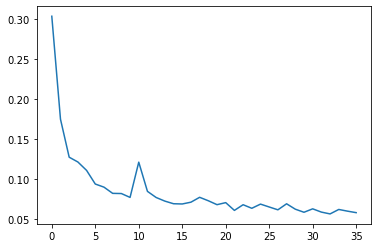

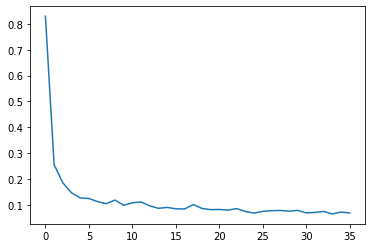

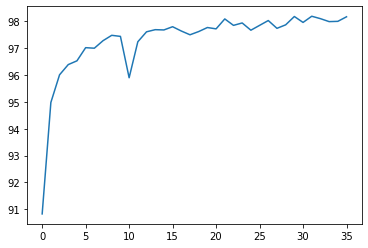

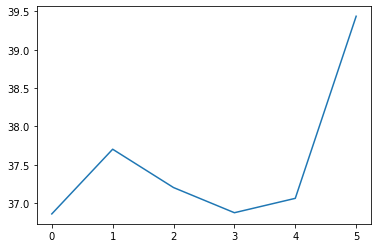

In [24]:
plt.plot(stats[0])
plt.show()
plt.plot(stats[1])
plt.show()
plt.plot(stats[2])
plt.show()
plt.plot(stats[3])
plt.show()

In [23]:
start = time.process_time_ns()
for epoch in range(4):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_dataloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = NN(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 100 == 99:    # print every 100 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] train_loss: {running_loss / 100:.3f}')
            running_loss = 0.0
            print(test_loss(NN, test_dataloader, criterion, device))
    scheduler.step()
end = time.process_time_ns()

etime = (end - start) * 1e-9
print(etime)

[1,   100] train_loss: 0.061
(0.05311937771271914, 98.2)
[1,   200] train_loss: 0.053
(0.059031368843861856, 98.01)
[1,   300] train_loss: 0.053
(0.05353626917873044, 98.23)
[1,   400] train_loss: 0.064
(0.053250387821753974, 98.3)
[1,   500] train_loss: 0.048
(0.05527240294148214, 98.13)
[1,   600] train_loss: 0.063
(0.05131261435570195, 98.32)
[2,   100] train_loss: 0.050
(0.05090497891214909, 98.3)
[2,   200] train_loss: 0.054
(0.05194674534490332, 98.23)
[2,   300] train_loss: 0.057
(0.05115531984542031, 98.33)
[2,   400] train_loss: 0.060
(0.06059402960236184, 98.04)
[2,   500] train_loss: 0.052
(0.050910910094389694, 98.33)
[2,   600] train_loss: 0.055
(0.06105333242448978, 97.95)
[3,   100] train_loss: 0.049
(0.05134971106512239, 98.28)
[3,   200] train_loss: 0.050
(0.050152129139460155, 98.31)
[3,   300] train_loss: 0.055
(0.049587815105041955, 98.28)
[3,   400] train_loss: 0.055
(0.050915456654620356, 98.15)
[3,   500] train_loss: 0.053
(0.052116794208995995, 98.33)
[3,   600]

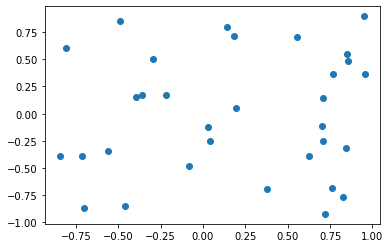

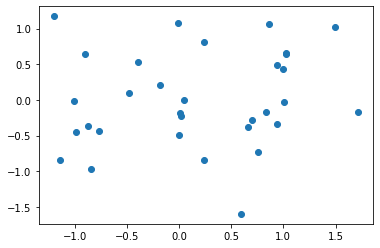

1.9767733


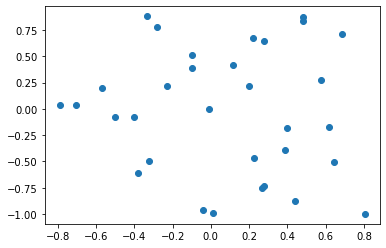

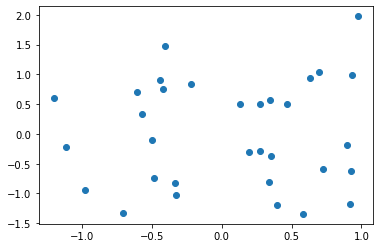

In [24]:
points = NN.NN[1].NN[3].shifts.detach().to("cpu").numpy()
initial_points = NN.NN[1].NN[3].initial.detach().to("cpu").numpy()
plt.scatter(initial_points[:, 0], initial_points[:,1])
plt.show()
plt.scatter(points[:, 0], points[:,1])
plt.show()

points = NN.NN[2].NN[3].shifts.detach().to("cpu").numpy()
initial_points = NN.NN[2].NN[3].initial.detach().to("cpu").numpy()
print(np.max(points))
plt.scatter(initial_points[:, 0], initial_points[:,1])
plt.show()
plt.scatter(points[:, 0], points[:,1])
plt.show()

In [23]:
from Models import MNIST_conv_Net

p_drop = 0.05
input_shape = (batch_size, 1, 28, 28)

NN2 = MNIST_conv_Net(input_shape, 10)

summary(NN2, input_shape)

Layer (type:depth-idx)                   Output Shape              Param #
MNIST_conv_Net                           [100, 10]                 --
├─Sequential: 1-1                        --                        --
│    └─Conv2d: 2-1                       [100, 32, 28, 28]         64
│    └─BatchNorm2d: 2-2                  [100, 32, 28, 28]         64
│    └─ReLU: 2-3                         [100, 32, 28, 28]         --
│    └─Conv2d: 2-4                       [100, 32, 28, 28]         9,248
│    └─BatchNorm2d: 2-5                  [100, 32, 28, 28]         64
│    └─ReLU: 2-6                         [100, 32, 28, 28]         --
│    └─Conv2d: 2-7                       [100, 32, 28, 28]         25,632
│    └─BatchNorm2d: 2-8                  [100, 32, 28, 28]         64
│    └─ReLU: 2-9                         [100, 32, 28, 28]         --
│    └─AvgPool2d: 2-10                   [100, 32, 4, 4]           --
│    └─Flatten: 2-11                     [100, 512]                --
│    └─L

In [24]:
criterion = CrossEntropyLoss()
optimizer = optim.SGD(NN2.parameters(), lr=0.05, momentum=0.9)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)

In [25]:
start = time.process_time_ns()
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_dataloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = NN2(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 100 == 99:    # print every 100 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] train_loss: {running_loss / 100:.3f}')
            running_loss = 0.0
            print(test_loss(NN2, test_dataloader, criterion, device))
    scheduler.step()

end = time.process_time_ns()

ex_time = (end - start) * 1e-9
print(ex_time)


[1,   100] train_loss: 0.461
(0.121927930675447, 96.43)
[1,   200] train_loss: 0.131
(0.08365229741670191, 97.49)
[1,   300] train_loss: 0.107
(0.06615080372663215, 97.9)
[1,   400] train_loss: 0.083
(0.06283143160515464, 98.08)
[1,   500] train_loss: 0.081
(0.06338795224088244, 97.96)
[1,   600] train_loss: 0.074
(0.06811735047958792, 97.62)
[2,   100] train_loss: 0.065
(0.056236699686851355, 98.18)
[2,   200] train_loss: 0.056
(0.046598938982351686, 98.49)
[2,   300] train_loss: 0.058
(0.04778041346522514, 98.42)
[2,   400] train_loss: 0.060
(0.0473111592719215, 98.38)
[2,   500] train_loss: 0.058
(0.049529263663862365, 98.46)
[2,   600] train_loss: 0.057
(0.050539112215628845, 98.24)
<module 'time' (built-in)>


In [26]:
print(ex_time)

74.25


In [6]:
from Models import MNIST_ownconv_Net

p_drop = 0.05
input_shape = (batch_size, 1, 28, 28)

NN7 = MNIST_ownconv_Net(input_shape, 10)

summary(NN7, input_shape)

Layer (type:depth-idx)                   Output Shape              Param #
MNIST_ownconv_Net                        [100, 10]                 --
├─Sequential: 1-1                        --                        --
│    └─Convolution: 2-1                  [100, 32, 28, 28]         64
│    └─BatchNorm2d: 2-2                  [100, 32, 28, 28]         64
│    └─ReLU: 2-3                         [100, 32, 28, 28]         --
│    └─Convolution: 2-4                  [100, 32, 28, 28]         9,248
│    └─BatchNorm2d: 2-5                  [100, 32, 28, 28]         64
│    └─ReLU: 2-6                         [100, 32, 28, 28]         --
│    └─Convolution: 2-7                  [100, 32, 28, 28]         25,632
│    └─BatchNorm2d: 2-8                  [100, 32, 28, 28]         64
│    └─ReLU: 2-9                         [100, 32, 28, 28]         --
│    └─AvgPool2d: 2-10                   [100, 32, 4, 4]           --
│    └─Flatten: 2-11                     [100, 512]                --
│    └─L

In [7]:
criterion = CrossEntropyLoss()
optimizer = optim.SGD(NN7.parameters(), lr=0.05, momentum=0.9)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)

In [8]:
start = time.process_time_ns()
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_dataloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = NN7(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 100 == 99:    # print every 100 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] train_loss: {running_loss / 100:.3f}')
            running_loss = 0.0
            print(test_loss(NN7, test_dataloader, criterion, device))
    scheduler.step()

end = time.process_time_ns()

ex_time = (end - start) * 1e-9
print(ex_time)


[1,   100] train_loss: 0.443
(0.14954133453778923, 95.65)
[1,   200] train_loss: 0.142
(0.11050664996728302, 96.8)
[1,   300] train_loss: 0.113
(0.08021390593145043, 97.49)
[1,   400] train_loss: 0.091
(0.07375362691702321, 97.68)
[1,   500] train_loss: 0.075
(0.07009124706848524, 97.74)
[1,   600] train_loss: 0.073
(0.05946745510678739, 98.15)
[2,   100] train_loss: 0.068
(0.04791582834965084, 98.52)
[2,   200] train_loss: 0.065
(0.05863465374568477, 97.94)
[2,   300] train_loss: 0.061
(0.05941478566732258, 98.03)
[2,   400] train_loss: 0.064
(0.045471809108857994, 98.55)
[2,   500] train_loss: 0.061
(0.04623834103695117, 98.41)
[2,   600] train_loss: 0.051
(0.04385421248618513, 98.55)
<module 'time' (built-in)>


In [9]:
print(ex_time)

75.90625


In [9]:
from Models import MNIST_Net2

expansion_rate = 3
input_shape = (batch_size, 1, 28, 28)

NN3 = MNIST_Net2(input_shape, 10)

summary(NN3, input_shape)

Layer (type:depth-idx)                   Output Shape              Param #
MNIST_Net2                               [100, 10]                 --
├─Sequential: 1-1                        --                        --
│    └─Conv2d: 2-1                       [100, 32, 28, 28]         64
│    └─CSC_block: 2-2                    [100, 32, 28, 28]         --
│    │    └─Sequential: 3-1              --                        6,720
│    └─CSC_block: 2-3                    [100, 32, 28, 28]         --
│    │    └─Sequential: 3-2              --                        6,720
│    └─CSC_block: 2-4                    [100, 32, 28, 28]         --
│    │    └─Sequential: 3-3              --                        6,720
│    └─AvgPool2d: 2-5                    [100, 32, 4, 4]           --
│    └─Flatten: 2-6                      [100, 512]                --
│    └─Linear: 2-7                       [100, 10]                 5,130
Total params: 25,354
Trainable params: 25,354
Non-trainable params: 0
Tot

In [7]:
criterion = CrossEntropyLoss()
optimizer = optim.SGD(NN3.parameters(), lr=0.05, momentum=0.9)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)

In [8]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_dataloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = NN3(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 100 == 99:    # print every 100 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] train_loss: {running_loss / 100:.3f}')
            running_loss = 0.0
            print(test_loss(NN3, test_dataloader, criterion, device))
    scheduler.step()

[1,   100] train_loss: 0.509
(0.23171740879304706, 93.05)
[1,   200] train_loss: 0.176
(0.11580315442988649, 96.14)
[1,   300] train_loss: 0.130
(0.11617182110901922, 96.27)
[1,   400] train_loss: 0.132
(0.09387944596121088, 96.96)
[1,   500] train_loss: 0.134
(0.09338684955437201, 96.9)
[1,   600] train_loss: 0.102
(0.06715060683432966, 97.68)
[2,   100] train_loss: 0.091
(0.07073068731755484, 97.68)
[2,   200] train_loss: 0.087
(0.08192401613050607, 97.34)
[2,   300] train_loss: 0.084
(0.07734284515725448, 97.61)
[2,   400] train_loss: 0.082
(0.0925876001745928, 97.02)
[2,   500] train_loss: 0.088
(0.09988075721426867, 96.62)
[2,   600] train_loss: 0.080
(0.06303482159040869, 97.96)


In [10]:
expansion_rate = 1
input_shape = (batch_size, 1, 28, 28)

NN4 = MNIST_Net2(input_shape, 10, expansion_rate, device)

summary(NN4, input_shape)

Layer (type:depth-idx)                   Output Shape              Param #
MNIST_Net2                               [100, 10]                 --
├─Sequential: 1-1                        --                        --
│    └─Conv2d: 2-1                       [100, 32, 28, 28]         64
│    └─CSC_block: 2-2                    [100, 32, 28, 28]         --
│    │    └─Sequential: 3-1              --                        2,304
│    └─CSC_block: 2-3                    [100, 32, 28, 28]         --
│    │    └─Sequential: 3-2              --                        2,304
│    └─CSC_block: 2-4                    [100, 32, 28, 28]         --
│    │    └─Sequential: 3-3              --                        2,304
│    └─AvgPool2d: 2-5                    [100, 32, 4, 4]           --
│    └─Flatten: 2-6                      [100, 512]                --
│    └─Linear: 2-7                       [100, 10]                 5,130
Total params: 12,106
Trainable params: 12,106
Non-trainable params: 0
Tot

In [11]:
criterion = CrossEntropyLoss()
optimizer = optim.SGD(NN4.parameters(), lr=0.05, momentum=0.9)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)

In [12]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_dataloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = NN4(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 100 == 99:    # print every 100 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] train_loss: {running_loss / 100:.3f}')
            running_loss = 0.0
            print(test_loss(NN4, test_dataloader, criterion, device))
    scheduler.step()

[1,   100] train_loss: 0.569
(0.18625395480543375, 94.0)
[1,   200] train_loss: 0.168
(0.12762564175296576, 95.99)
[1,   300] train_loss: 0.138
(0.10866357750957832, 96.47)
[1,   400] train_loss: 0.125
(0.10119087643921375, 96.86)
[1,   500] train_loss: 0.101
(0.07436577038373798, 97.6)
[1,   600] train_loss: 0.094
(0.08836525014252401, 97.2)
[2,   100] train_loss: 0.098
(0.06228518116287887, 98.07)
[2,   200] train_loss: 0.083
(0.07463950763689355, 97.66)
[2,   300] train_loss: 0.078
(0.0749166457017418, 97.52)
[2,   400] train_loss: 0.082
(0.060831173137994486, 98.1)
[2,   500] train_loss: 0.072
(0.058170136823318896, 98.15)
[2,   600] train_loss: 0.070
(0.059499458849313666, 98.13)
